# Install and Import Libraries

In [ ]:
# install libraries
pip install yfinance matplotlib pandas

In [ ]:
# import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


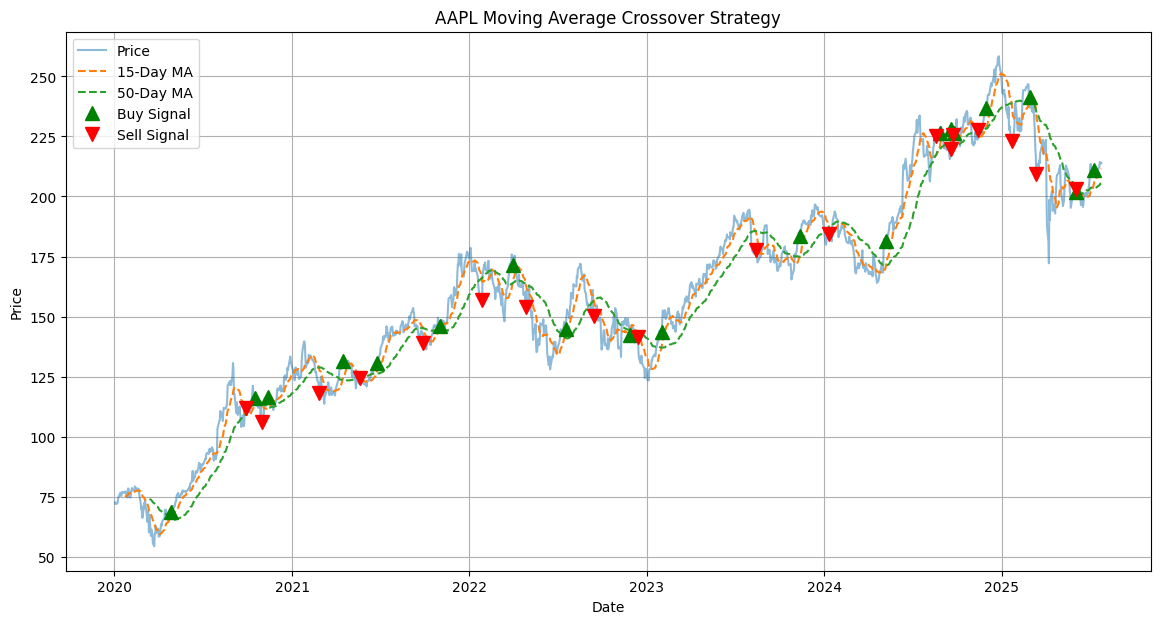

In [37]:
ticker = "AAPL"          
start_date = "2020-01-01"
short_term_MA = 15 # 15 day moving average
long_term_MA = 50 # 50 day moving average

# load in data
data = yf.download(ticker, start=start_date)
data = data[['Close']] # only keep closing prices

# calculate moving averages
data['short_MA'] = data['Close'].rolling(short_term_MA).mean()
data['long_MA'] = data['Close'].rolling(long_term_MA).mean()

# buy/sell signals
data['Signal'] = 0 # creates new column in dataframe, set every row to 0 meaning there is no trade
data['Signal'] = (data['short_MA'] > data['long_MA']).astype(int) # core logic of the strategy -> if short MA > long MA, return TRUE, astype(int) converts TRUE to 1 and FALSE to 0 -> 1 meaning enter/stay in a trade and 0 meaning exit or stay out of trade
data.loc[:data.index[long_term_MA - 1], 'Signal'] = 0 # first 49 rows of long_term_MA are unusable, so the first 49 days will be set to 0
data['Position'] = data['Signal'].diff()  # 1 = buy signal (entering a trade), -1 = sell signal (exiting a trade), 0 = no change (holding)

# plot AAPL closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Price', alpha=0.5) # make AAPL price chart more translucent
plt.plot(data['short_MA'], label=f'{short_term_MA}-Day MA', linestyle='--')
plt.plot(data['long_MA'], label=f'{long_term_MA}-Day MA', linestyle='--')

# plot buy signals when position = 1
plt.plot(
    data[data['Position'] == 1].index,
    data['Close'][data['Position'] == 1],  
    '^', markersize=10, color='green', label='Buy Signal'
)

# plot sell signals when position = -1
plt.plot(
    data[data['Position'] == -1].index,
    data['Close'][data['Position'] == -1],  
    'v', markersize=10, color='red', label='Sell Signal'
)

plt.title(f'{ticker} Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

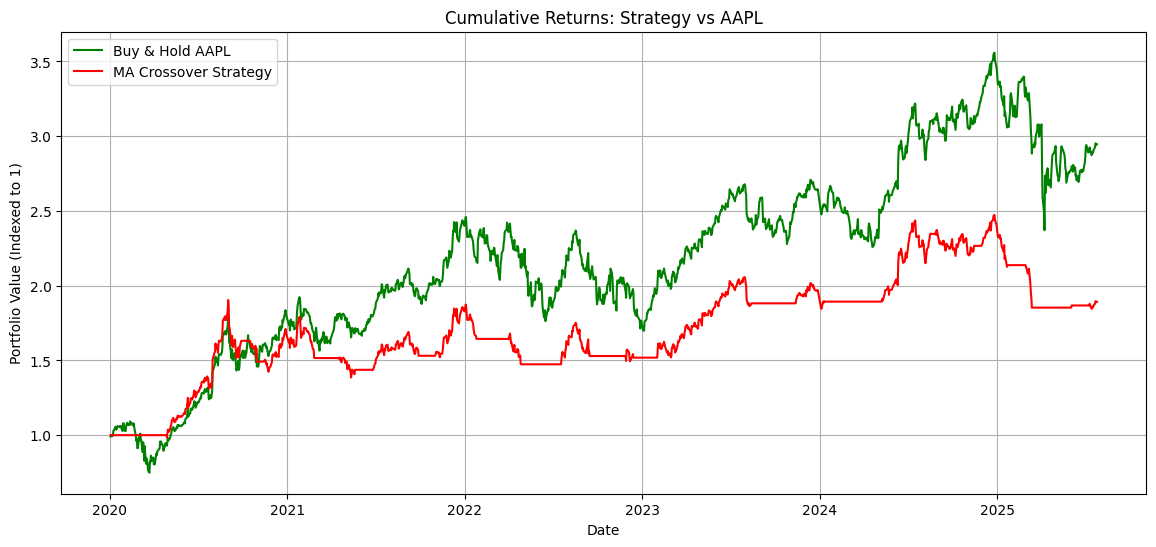

In [38]:
# plot AAPL vs MA crossover strategy returns
data['AAPL_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['AAPL_Return'] * data['Signal'].shift(1)

data['AAPL_CumReturn'] = (1 + data['AAPL_Return']).cumprod()
data['Strategy_CumReturn'] = (1 + data['Strategy_Return']).cumprod()

plt.figure(figsize=(14, 6))
plt.plot(data['AAPL_CumReturn'], label='Buy & Hold AAPL', color='green')
plt.plot(data['Strategy_CumReturn'], label='MA Crossover Strategy', color='red')
plt.title('Cumulative Returns: Strategy vs AAPL')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Indexed to 1)')
plt.legend()
plt.grid(True)
plt.show()